In [1]:
import sqlite3
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parser
import json

con = sqlite3.connect("SQLite/YoutubeStats.sqlite") 
watch_history_all_df = pd.read_sql_query("SELECT * from watch_history_v1", con)
wh_df = watch_history_all_df[watch_history_all_df.is_available == 1]
wh_df.head()

# Data for year range
start_year = 2016
end_year = 2021
year_range = (start_year, end_year)
year_range_string = str(year_range[0]) if year_range[0] == year_range[1] else f"{year_range[0]} - {year_range[1]}"
label_videos_over_range = f"# of videos watched ({year_range_string})"
# range(year_range[0], year_range[1]+1):
wh_df = wh_df[(year_range[0] <= wh_df.year_date) & (wh_df.year_date <= year_range[1])]
video_count_in_df = len(wh_df.watch_id)

# Get weeks diff betweendate first and last video in
last_video_date = parser.parse(wh_df["date_time_iso"].iloc[0])
first_video_date = parser.parse(wh_df["date_time_iso"].iloc[-1])
difference = last_video_date - first_video_date
years_diff_date_range = difference.days // 365
weeks_diff_date_range = difference.days // 7
days_diff_date_range = difference.days
hours_diff_date_range = difference.days * 24
minutes_diff_date_range = difference.days * 60

wh_df.describe()

,watch_id,year_date,month_date,day_date,hour_time,day_of_week,is_available,category_id
count,26660.000000,26660.000000,26660.000000,26660.000000,26660.000000,26660.000000,26660.0,26555.000000
mean,20431.625431,2018.548837,6.971268,15.614366,13.653413,2.997374,1.0,19.551873
std,8501.437504,1.776889,3.391372,8.761119,6.969756,2.034861,0.0,6.355613
min,5884.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
25%,13088.750000,2017.000000,4.000000,8.000000,9.000000,1.000000,1.0,17.000000
50%,20306.500000,2018.000000,7.000000,15.000000,16.000000,3.000000,1.0,22.000000
75%,27669.250000,2020.000000,10.000000,23.000000,19.000000,5.000000,1.0,24.000000
max,35564.000000,2021.000000,12.000000,31.000000,23.000000,6.000000,1.0,30.000000


In [123]:
# wh_df.head()

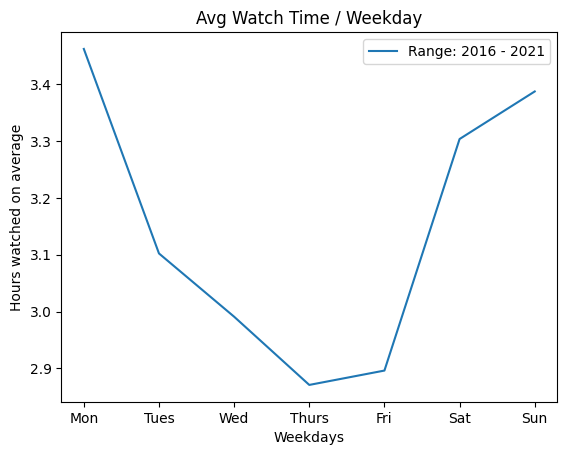

In [2]:
# VIDEO
# Change string to int
wh_df['video_length_secs'] = wh_df['video_length_secs'].astype(int)

# Filter dataframe and group by desired index
weekdays_count_df = wh_df[["video_length_secs", "day_of_week"]]
weekdays_count_df = weekdays_count_df.groupby("day_of_week").sum().reset_index()

# Data manipulation. total secs for a sunday into hours watched on average on a sunday
weekdays_count_df['hours_watched_avg'] = weekdays_count_df['video_length_secs'].apply(lambda x: x / (60*60*weeks_diff_date_range))

# label mapping
weekdays_map = {0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri', 5:'Sat',6:'Sun'}
weekdays_count_df["day_of_week"]=weekdays_count_df["day_of_week"].map(weekdays_map)

weekdays_count_df.plot(x="day_of_week", y="hours_watched_avg", title="Avg Watch Time / Weekday", xlabel = "Weekdays", ylabel="Hours watched on average").legend([f"Range: {start_year} - {end_year}"])

In [53]:
# wh_df[wh_df.channel_name == 'Lofi Girl']

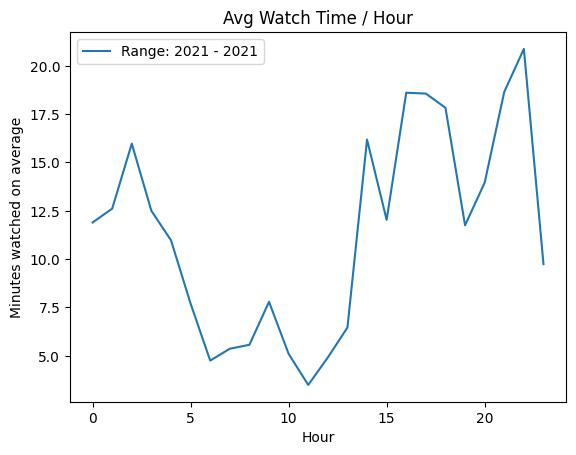

In [55]:
wh_df['video_length_secs'] = wh_df['video_length_secs'].astype(int)
videos_by_hour = wh_df[["video_length_secs", "hour_time"]]
videos_by_hour = videos_by_hour.groupby("hour_time").sum().reset_index()
videos_by_hour['minutes_watched_avg'] = videos_by_hour['video_length_secs'].apply(lambda x: x / (60*days_diff_date_range))
# videos_by_hour
# days_diff_date_range
videos_by_hour.plot(x="hour_time", y="minutes_watched_avg", title="Avg Watch Time / Hour", xlabel = "Hour", ylabel="Minutes watched on average").legend([f"Range: {start_year} - {end_year}"])
# weekdays_count_df.plot(x="day_of_week", y="hours_watched_avg", title="Avg Watch Time / Weekday", xlabel = "Weekdays", ylabel="Minutes watched on average").legend([f"Range: {start_year} - {end_year}"])

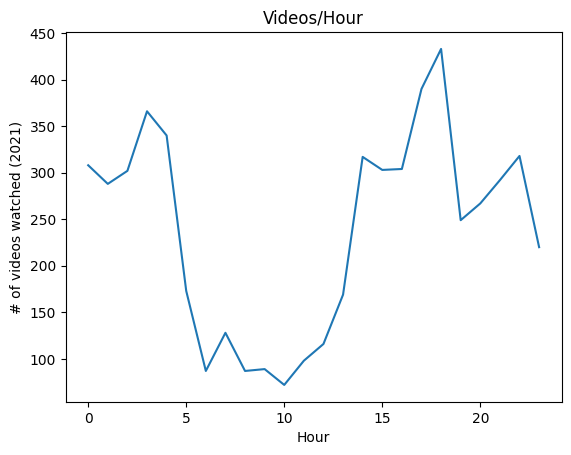

In [182]:
# weekdays_count_df = wh_df["day_of_week"].value_counts().rename_axis('Weekdays').reset_index(name='counts').sort_values('Weekdays')
videos_by_hour = wh_df["hour_time"].value_counts().rename_axis('hour').reset_index(name='count').sort_values('hour')
videos_by_hour.plot(x="hour", y='count', title="Videos/Hour", xlabel = "Hour", ylabel=label_videos_over_range).get_legend().remove()

In [152]:
wh_df.head()
tags_df = wh_df["tags"].reset_index()
# tags_df = wh_df["tags"].value_counts().reset_index(name="count")
# tags_df = tags_df.explode("tags")
tags_df
tags_df["tags"] = tags_df["tags"].apply(lambda x: x.replace('\'', '"'))

tags_df.explode("tags")


# all_tags_df = pd.DataFrame()
# for i in range(len(tags_df)):
#     row = tags_df["tags"].iloc[i].replace('\'', '"')
#     tags_df = pd.DataFrame(json.loads(row))
#     tags_df
#     pd.concat([all_tags_df, tags_df])
# all_tags_df


# tags_df['tags'].fillna(value=np.nan)
# tags_df["tags_obj"] = tags_df["tags"].apply(lambda x: x.replace('\'', '"'))
# tags_df
# tags_df.explode("tags")
# list_of_tags["tags_list"] = wh_df["tags"]
# list_of_tags

AttributeError: 'NoneType' object has no attribute 'replace'

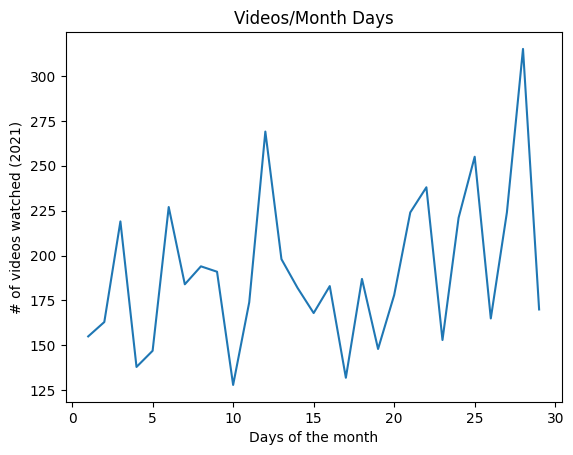

In [178]:
# Count of videos per day of the month, can do same with months
videos_per_day_df = wh_df[wh_df.day_date <= 29] 
videos_per_day_df = videos_per_day_df["day_date"].value_counts().rename_axis('days_number').reset_index(name='count').sort_values('days_number')

videos_per_day_df
plot = videos_per_day_df.plot(x="days_number", y="count", title='Videos/Month Days', xlabel="Days of the month", ylabel = videos_over_range_label).get_legend().remove()


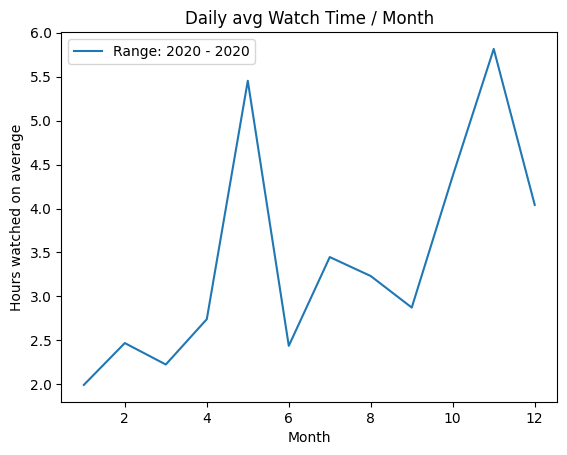

In [67]:
wh_df['video_length_secs'] = wh_df['video_length_secs'].astype(int)
videos_by_month = wh_df[["video_length_secs", "month_date"]]
videos_by_month = videos_by_month.groupby("month_date").sum().reset_index()

# is this correct? secs->mins->hours->hours/year->hours/day
videos_by_month['hours_watched_avg'] = videos_by_month['video_length_secs'].apply(lambda x: x / (60*60*years_diff_date_range*30))
# videos_by_hour
# days_diff_date_range
videos_by_month.plot(x="month_date", y="hours_watched_avg", title="Daily avg Watch Time / Month", xlabel = "Month", ylabel="Hours watched on average").legend([f"Range: {start_year} - {end_year}"])
# weekdays_count_df.plot(x="day_of_week", y="hours_watched_avg", title="Avg Watch Time / Weekday", xlabel = "Weekdays", ylabel="Minutes watched on average").legend([f"Range: {start_year} - {end_year}"])

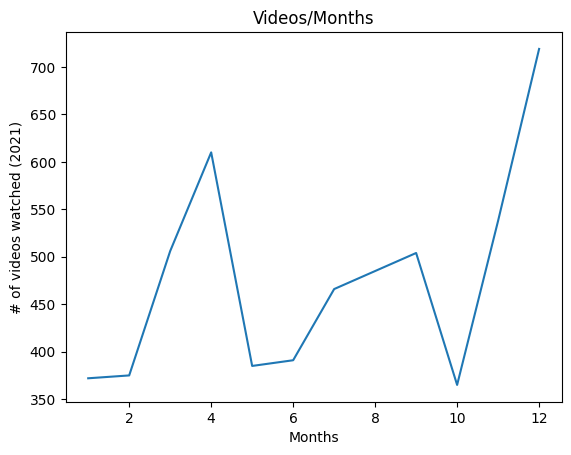

In [183]:
# Count of videos per months
videos_per_month_df = wh_df["month_date"].value_counts().rename_axis('months').reset_index(name='count').sort_values('months')
videos_per_month_df
videos_per_month_df.plot(x="months", y="count", title='Videos/Months', xlabel="Months", ylabel=label_videos_over_range).get_legend().remove()

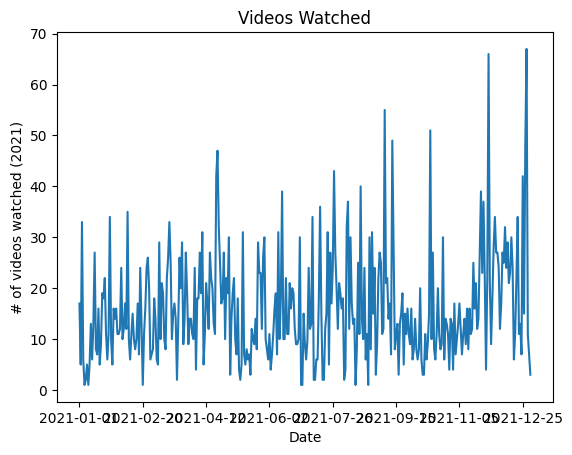

In [186]:
# AVERAGE PER DAY
videos_over_time_df = wh_df["date_"].value_counts().rename_axis('Date').reset_index(name='num_of_videos')
videos_over_time_df = videos_over_time_df.sort_values('Date',ascending=True)
videos_over_time_plot = videos_over_time_df.plot(x="Date", y="num_of_videos", title='Videos Watched', xlabel="Date", ylabel=label_videos_over_range).get_legend().remove()


IndexError: index 0 is out of bounds for axis 0 with size 0

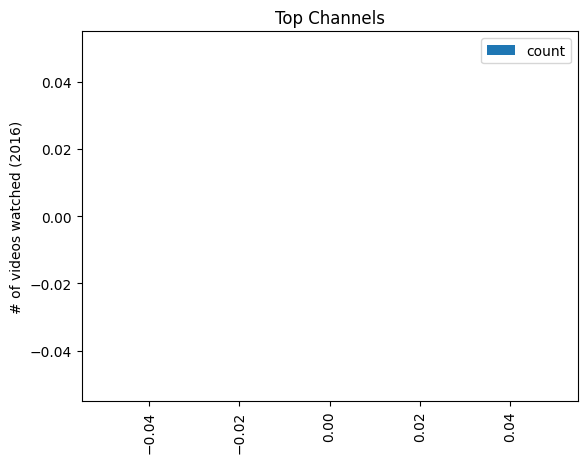

In [2]:
# TOP channels
top_channels_df = wh_df["channel_name"].value_counts().rename_axis('channel_name').reset_index(name='count').sort_values('count', ascending = False)
top_channels_df = top_channels_df.head(10)
top_channels_df.plot.bar(x="channel_name", y="count", title='Top Channels', xlabel="Channel Name", ylabel=label_videos_over_range).get_legend().remove()

In [3]:
# # Normalization no aporta nada
# vot_df = videos_over_time_df["num_of_videos"]
# vot_norm_df = (vot_df - vot_df.mean()) / vot_df.std()
# videos_over_time_df["num_of_vids_normalized"] = vot_norm_df
# videos_over_time_df.plot(x="Date", y="num_of_vids_normalized")
# wh_df[wh_df.date_ == "2022-10-30"]

In [8]:
for i in range(0,10):
    print(f"{i}: ola sarah")
    


0: ola sarah
1: ola sarah
2: ola sarah
3: ola sarah
4: ola sarah
5: ola sarah
6: ola sarah
7: ola sarah
8: ola sarah
9: ola sarah
